In [27]:
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt 
import numpy as np
import cv2

CATEGORIES = {
    'alert': 0, 'button': 1, 'card': 2, 'checkbox_checked': 3,
    'checkbox_unchecked': 4, 'chip': 5, 'data_table': 6, 'dropdown_menu': 7,
    'floating_action_button': 8, 'grid_list': 9, 'image': 10, 'label': 11,
    'menu': 12, 'radio_button_checked': 13, 'radio_button_unchecked': 14, 
    'slider': 15, 'switch_disabled': 16, 'switch_enabled': 17, 
    'text_area': 18, 'text_field': 19, 'tooltip': 20
}
COUNT = CATEGORIES.__len__()

In [30]:
class InputDate:
    __slots__ = ['images', '__index', 'labels', '_size']
    shape = (224, 224, 1)
    
    def __init__(self, _size: int) -> None:
        self.images = np.empty((_size, 224, 224, 1), dtype='float16')
        self.labels = np.empty(_size, dtype='uint8')
        
        self.__index = 0
        self._size = _size
    
    def add_img(self, _path: str, _cat: str) -> None:
        img = cv2.imread(_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.bitwise_not(img)
        
        self.images[self.__index] = \
            np.asarray(img).astype('float32').reshape(self.shape) / 255
        self.labels[self.__index] = CATEGORIES[_cat]
        self.__index += 1
        
        if self.__index == self._size:
            self.__done()
    
    def __done(self):
        self.labels = to_categorical(self.labels)
    
    def show(self, _i: int) -> None:
        plt.imshow(self.images[_i], cmap='gray')

array([[0., 1.],
       [1., 0.]], dtype=float32)

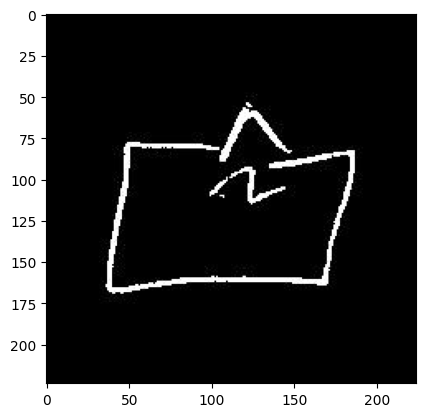

In [31]:
img_list = ['test_img.jpg', 'test_2.jpg']
cat_list = ['button', 'alert']

train = InputDate(img_list.__len__())
for path, cat in zip(img_list, cat_list):
    train.add_img(path, cat)
    
train.show(1)
train.labels

In [ ]:
from tensorflow.keras import layers, models

h_activ, f_activ = 'relu', 'softmax'
kernel_s, pool_s = (3, 3), (2, 2)

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_s, activation=h_activ, input_shape=train.shape))
model.add(layers.MaxPooling2D(pool_size=pool_s))
model.add(layers.Conv2D(64, kernel_s, activation=h_activ))
model.add(layers.MaxPooling2D(pool_size=pool_s))
model.add(layers.Conv2D(64, kernel_s, activation=h_activ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=h_activ))
model.add(layers.Dense(COUNT, activation=f_activ))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train.images, train.labels, epochs=COUNT, batch_size=64, validation_split=0.2)
model.save('model_v0.1.h5')

In [ ]:
model_test = model.load_model('model_v0.1.h5')

#test_loss, test_acc = model_test.evaluate(test_images, test_labels)
#print(f'Test accuracy: {test_acc}')